In [4]:
!pip install nibabel nilearn matplotlib scipy



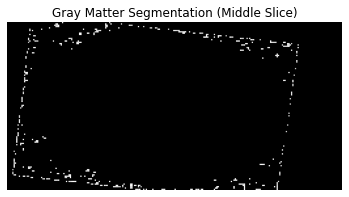

✅ Gray Matter segmentation complete. Saved as 'gray_matter_segmentation.png'.


In [5]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn.image import smooth_img
from scipy.stats import gaussian_kde

# === Step 1: Load the NIfTI MRI File ===
nifti_path = "mprage.nii.gz"  # Update this with the correct path
img = nib.load(nifti_path)
data = img.get_fdata()

# === Step 2: Smooth the Image (Preprocessing) ===
smoothed_img = smooth_img(img, fwhm=2)  # Apply a small smoothing filter
smoothed_data = smoothed_img.get_fdata()

# === Step 3: Find GM Intensity Threshold using Histogram & KDE ===
flattened_data = smoothed_data.flatten()
density = gaussian_kde(flattened_data[flattened_data > 0])  # Ignore background
x_vals = np.linspace(np.min(flattened_data), np.max(flattened_data), 100)
pdf_vals = density(x_vals)

# Set threshold at the first peak (assumed GM)
gm_threshold = x_vals[np.argmax(pdf_vals)]

# === Step 4: Segment Gray Matter Using Thresholding ===
gray_matter_mask = (smoothed_data > gm_threshold * 0.9) & (smoothed_data < gm_threshold * 1.2)
gray_matter = np.where(gray_matter_mask, smoothed_data, 0)  # Keep only GM voxels

# === Step 5: Save Middle Slice as PNG ===
mid_slice = gray_matter.shape[2] // 2  # Get middle axial slice

plt.figure(figsize=(6, 6))
plt.imshow(gray_matter[:, :, mid_slice], cmap="gray")
plt.axis("off")
plt.title("Gray Matter Segmentation (Middle Slice)")
plt.savefig("gray_matter_segmentation.png", dpi=300, bbox_inches="tight")
plt.show()

print("✅ Gray Matter segmentation complete. Saved as 'gray_matter_segmentation.png'.")


In [6]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn.image import smooth_img, compute_brain_mask
from sklearn.mixture import GaussianMixture

# === Step 1: Load the MRI NIfTI File ===
nifti_path = "mprage.nii.gz"  # Update this with your file path
img = nib.load(nifti_path)
data = img.get_fdata()

# === Step 2: Skull Stripping (Remove Non-Brain Areas) ===
brain_mask = compute_brain_mask(img)  # Creates a binary brain mask
brain_data = data * brain_mask  # Apply mask to remove background

# === Step 3: Apply Gaussian Mixture Model (GMM) for Tissue Classification ===
flattened_data = brain_data[brain_data > 0].reshape(-1, 1)  # Remove zero (background)
gmm = GaussianMixture(n_components=3)  # Assume GM, WM, and CSF
gmm.fit(flattened_data)

# Get mean intensity for each component (sorted: CSF, GM, WM)
tissue_classes = np.argsort(gmm.means_.flatten())
gm_threshold_low, gm_threshold_high = gmm.means_[tissue_classes[1]] * [0.9, 1.1]

# === Step 4: Segment Gray Matter ===
gray_matter_mask = (brain_data > gm_threshold_low) & (brain_data < gm_threshold_high)
gray_matter = np.where(gray_matter_mask, brain_data, 0)

# === Step 5: Save the Middle Slice as PNG ===
mid_slice = gray_matter.shape[2] // 2  # Take the middle axial slice

plt.figure(figsize=(6, 6))
plt.imshow(gray_matter[:, :, mid_slice], cmap="gray")
plt.axis("off")
plt.title("Improved Gray Matter Segmentation (Middle Slice)")
plt.savefig("gray_matter_segmentation_improved.png", dpi=300, bbox_inches="tight")
plt.show()

print("✅ Improved Gray Matter segmentation complete. Saved as 'gray_matter_segmentation_improved.png'.")


ImportError: cannot import name 'compute_brain_mask' from 'nilearn.image' (C:\Users\SRMAP\anaconda3\lib\site-packages\nilearn\image\__init__.py)

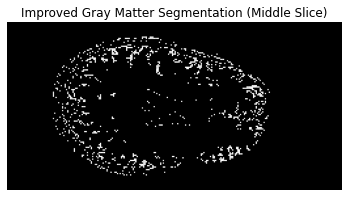

✅ Improved Gray Matter segmentation complete. Saved as 'gray_matter_segmentation_improved.png'.


In [8]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn.image import smooth_img
from nilearn.masking import compute_brain_mask
from sklearn.mixture import GaussianMixture

# === Step 1: Load the MRI NIfTI File ===
nifti_path = "mprage.nii.gz"  # Update with your file path
img = nib.load(nifti_path)
data = img.get_fdata()

# === Step 2: Skull Stripping (Remove Non-Brain Areas) ===
brain_mask = compute_brain_mask(img).get_fdata()  # ✅ Convert to NumPy array
brain_data = data * brain_mask  # ✅ Apply mask to remove non-brain tissue

# === Step 3: Apply Gaussian Mixture Model (GMM) for Tissue Classification ===
flattened_data = brain_data[brain_data > 0].reshape(-1, 1)  # Remove zero (background)
gmm = GaussianMixture(n_components=3)  # Assume GM, WM, and CSF
gmm.fit(flattened_data)

# Get mean intensity for each component (sorted: CSF, GM, WM)
tissue_classes = np.argsort(gmm.means_.flatten())
gm_threshold_low, gm_threshold_high = gmm.means_[tissue_classes[1]] * [0.9, 1.1]

# === Step 4: Segment Gray Matter ===
gray_matter_mask = (brain_data > gm_threshold_low) & (brain_data < gm_threshold_high)
gray_matter = np.where(gray_matter_mask, brain_data, 0)

# === Step 5: Save the Middle Slice as PNG ===
mid_slice = gray_matter.shape[2] // 2  # Take the middle axial slice

plt.figure(figsize=(6, 6))
plt.imshow(gray_matter[:, :, mid_slice], cmap="gray")
plt.axis("off")
plt.title("Improved Gray Matter Segmentation (Middle Slice)")
plt.savefig("gray_matter_segmentation_improved.png", dpi=300, bbox_inches="tight")
plt.show()

print("✅ Improved Gray Matter segmentation complete. Saved as 'gray_matter_segmentation_improved.png'.")


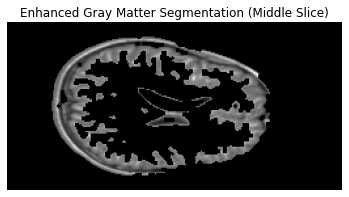

✅ Gray Matter segmentation improved! Saved as 'enhanced_gray_matter_segmentation.png'.


In [9]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn.image import smooth_img
from nilearn.masking import compute_brain_mask
from sklearn.mixture import GaussianMixture
from scipy.ndimage import binary_closing

# === Step 1: Load the MRI NIfTI File ===
nifti_path = "mprage.nii.gz"  # Update this with your file path
img = nib.load(nifti_path)
data = img.get_fdata()

# === Step 2: Normalize Intensity Values ===
normalized_data = (data - np.min(data)) / (np.max(data) - np.min(data))

# === Step 3: Apply Smoothing to Reduce Noise ===
smoothed_img = smooth_img(img, fwhm=2)  # Smooth with a 2mm kernel
smoothed_data = smoothed_img.get_fdata()

# === Step 4: Skull Stripping (Remove Non-Brain Areas) ===
brain_mask = compute_brain_mask(img).get_fdata()  # Convert to NumPy array
brain_data = smoothed_data * brain_mask  # Apply mask to remove non-brain regions

# === Step 5: Gaussian Mixture Model (GMM) for Tissue Classification ===
flattened_data = brain_data[brain_data > 0].reshape(-1, 1)  # Remove zero (background)
gmm = GaussianMixture(n_components=3, random_state=42)  # Assume CSF, GM, WM
gmm.fit(flattened_data)

# Sort classes by mean intensity (CSF, GM, WM)
tissue_classes = np.argsort(gmm.means_.flatten())
gm_threshold_low, gm_threshold_high = np.percentile(flattened_data, [30, 70])  # Adaptive thresholding

# === Step 6: Segment Gray Matter ===
gray_matter_mask = (brain_data > gm_threshold_low) & (brain_data < gm_threshold_high)
gray_matter_mask = binary_closing(gray_matter_mask, structure=np.ones((3,3,3)))  # Remove noise
gray_matter = np.where(gray_matter_mask, brain_data, 0)

# === Step 7: Save the Middle Slice as PNG ===
mid_slice = gray_matter.shape[2] // 2  # Take the middle axial slice

plt.figure(figsize=(6, 6))
plt.imshow(gray_matter[:, :, mid_slice], cmap="gray")
plt.axis("off")
plt.title("Enhanced Gray Matter Segmentation (Middle Slice)")
plt.savefig("enhanced_gray_matter_segmentation.png", dpi=300, bbox_inches="tight")
plt.show()

print("✅ Gray Matter segmentation improved! Saved as 'enhanced_gray_matter_segmentation.png'.")


### Gray Matter Extraction

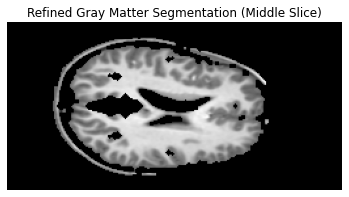

✅ Refined Gray Matter segmentation complete! Saved as 'refined_gray_matter_segmentation.png'.


In [10]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn.image import smooth_img
from nilearn.masking import compute_brain_mask
from sklearn.mixture import GaussianMixture
from scipy.ndimage import binary_closing, binary_opening
from skimage.filters import threshold_otsu

# === Step 1: Load the MRI NIfTI File ===
nifti_path = "mprage.nii.gz"  # Update with the correct file path
img = nib.load(nifti_path)
data = img.get_fdata()

# === Step 2: Normalize Intensity Values ===
normalized_data = (data - np.min(data)) / (np.max(data) - np.min(data))

# === Step 3: Apply Smoothing to Reduce Noise ===
smoothed_img = smooth_img(img, fwhm=2)  # Smooth with a 2mm kernel
smoothed_data = smoothed_img.get_fdata()

# === Step 4: Skull Stripping (Remove Non-Brain Areas) ===
brain_mask = compute_brain_mask(img).get_fdata()  # Convert to NumPy array
brain_data = smoothed_data * brain_mask  # Apply mask to remove non-brain regions

# === Step 5: Gaussian Mixture Model (GMM) for Tissue Classification ===
flattened_data = brain_data[brain_data > 0].reshape(-1, 1)  # Remove zero (background)
gmm = GaussianMixture(n_components=4, random_state=42)  # 4 components: CSF, GM, Deep GM, WM
gmm.fit(flattened_data)

# Assign class labels based on intensity
tissue_classes = np.argsort(gmm.means_.flatten())

# === Step 6: Otsu’s Thresholding for Adaptive Gray Matter Selection ===
otsu_threshold = threshold_otsu(flattened_data)
gray_matter_mask = brain_data > otsu_threshold  # Select GM intensities adaptively

# === Step 7: Apply Morphological Processing to Remove Noise ===
gray_matter_mask = binary_opening(gray_matter_mask, structure=np.ones((2,2,2)))  # Remove small artifacts
gray_matter_mask = binary_closing(gray_matter_mask, structure=np.ones((3,3,3)))  # Fill small gaps

# Extract the final gray matter region
gray_matter = np.where(gray_matter_mask, brain_data, 0)

# === Step 8: Save the Middle Slice as PNG ===
mid_slice = gray_matter.shape[2] // 2  # Take the middle axial slice

plt.figure(figsize=(6, 6))
plt.imshow(gray_matter[:, :, mid_slice], cmap="gray")
plt.axis("off")
plt.title("Refined Gray Matter Segmentation (Middle Slice)")
plt.savefig("refined_gray_matter_segmentation.png", dpi=300, bbox_inches="tight")
plt.show()

print("✅ Refined Gray Matter segmentation complete! Saved as 'refined_gray_matter_segmentation.png'.")


Steps for Extracting Gray Matter (GM) from MRI Scans
Your script follows these steps to extract gray matter from MRI scans:

Step 1: Load the MRI NIfTI File
Reads the .nii or .nii.gz file using nibabel.
Converts the image to a NumPy array for processing.
Step 2: Normalize Intensity Values
Normalizes the intensity values to a 0-1 range for better contrast and processing.
Step 3: Apply Smoothing to Reduce Noise
Uses a 2mm Gaussian kernel (smooth_img) to reduce noise.
Step 4: Skull Stripping (Remove Non-Brain Areas)
Computes a brain mask to remove non-brain regions.
Multiplies the brain mask with the image to retain only the brain.
Step 5: Gaussian Mixture Model (GMM) for Tissue Classification
Uses 4 components to classify different brain tissues:
CSF (Cerebrospinal Fluid)
Gray Matter (GM)
Deep GM (Subcortical structures like the thalamus)
White Matter (WM)
GMM assigns probability values to different tissues based on intensity distribution.
Step 6: Otsu’s Thresholding for Adaptive GM Selection
Otsu’s method finds an optimal threshold to separate gray matter from other tissues.
Pixels above the Otsu threshold are classified as gray matter.
Step 7: Morphological Processing to Refine GM Mask
Binary Opening removes small artifacts (noise).
Binary Closing fills small gaps in the GM mask.
The refined mask is applied to extract the final gray matter volume.
Step 8: Save the Middle Slice as PNG
Extracts the middle axial slice of the gray matter volume.
Saves it as a .png file in a separate folder for each patient.

In [6]:
import os
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
from nilearn.image import smooth_img
from nilearn.masking import compute_brain_mask
from sklearn.mixture import GaussianMixture
from scipy.ndimage import binary_closing, binary_opening
from skimage.filters import threshold_otsu

# Define the base directory containing patient folders
data_dir = "D:/Datasets/NYU"  # Update with your actual path
output_dir = "D:/Datasets/NYU_Segmented"  # Directory to save results
os.makedirs(output_dir, exist_ok=True)

# Process each patient folder
for patient_id in sorted(os.listdir(data_dir)):
    patient_folder = os.path.join(data_dir, patient_id, "session_1", "anat_1")
    
    if not os.path.exists(patient_folder):
        print(f"Skipping {patient_id}: anat_1 folder not found.")
        continue
    
    nifti_path = os.path.join(patient_folder, "mprage.nii")
    if not os.path.exists(nifti_path):
        nifti_path = os.path.join(patient_folder, "mprage.nii.gz")  # Handle .nii.gz files
    
    if not os.path.exists(nifti_path):
        print(f"Skipping {patient_id}: MRI file not found.")
        continue
    
    print(f"Processing {patient_id}...")
    
    # === Step 1: Load the MRI NIfTI File ===
    img = nib.load(nifti_path)
    data = img.get_fdata()
    
    # === Step 2: Normalize Intensity Values ===
    normalized_data = (data - np.min(data)) / (np.max(data) - np.min(data))
    
    # === Step 3: Apply Smoothing ===
    smoothed_img = smooth_img(img, fwhm=2)
    smoothed_data = smoothed_img.get_fdata()
    
    # === Step 4: Skull Stripping ===
    brain_mask = compute_brain_mask(img).get_fdata()
    brain_data = smoothed_data * brain_mask
    
    # === Step 5: GMM for Tissue Classification ===
    flattened_data = brain_data[brain_data > 0].reshape(-1, 1)
    gmm = GaussianMixture(n_components=4, random_state=42)
    gmm.fit(flattened_data)
    
    # === Step 6: Otsu’s Thresholding for GM Selection ===
    otsu_threshold = threshold_otsu(flattened_data)
    gray_matter_mask = brain_data > otsu_threshold
    
    # === Step 7: Morphological Processing ===
    gray_matter_mask = binary_opening(gray_matter_mask, structure=np.ones((2,2,2)))
    gray_matter_mask = binary_closing(gray_matter_mask, structure=np.ones((3,3,3)))
    gray_matter = np.where(gray_matter_mask, brain_data, 0)
    
    # === Step 8: Save the Middle Slice as PNG ===
    mid_slice = gray_matter.shape[2] // 2
    patient_output_folder = os.path.join(output_dir, patient_id)
    os.makedirs(patient_output_folder, exist_ok=True)
    output_path = os.path.join(patient_output_folder, f"{patient_id}_gray_matter.png")
    
    plt.figure(figsize=(6, 6))
    plt.imshow(gray_matter[:, :, mid_slice], cmap="gray")
    plt.axis("off")
    plt.title(f"Gray Matter Segmentation - {patient_id}")
    plt.savefig(output_path, dpi=300, bbox_inches="tight")
    plt.close()
    
    print(f"✅ {patient_id} processed! Saved as {output_path}.")

print("All patients processed successfully!")

Processing 0050952...
✅ 0050952 processed! Saved as D:/Datasets/NYU_Segmented\0050952\0050952_gray_matter.png.
Processing 0050953...
✅ 0050953 processed! Saved as D:/Datasets/NYU_Segmented\0050953\0050953_gray_matter.png.
Processing 0050954...
✅ 0050954 processed! Saved as D:/Datasets/NYU_Segmented\0050954\0050954_gray_matter.png.
Processing 0050955...
✅ 0050955 processed! Saved as D:/Datasets/NYU_Segmented\0050955\0050955_gray_matter.png.
Processing 0050956...
✅ 0050956 processed! Saved as D:/Datasets/NYU_Segmented\0050956\0050956_gray_matter.png.
Processing 0050957...
✅ 0050957 processed! Saved as D:/Datasets/NYU_Segmented\0050957\0050957_gray_matter.png.
Processing 0050958...
✅ 0050958 processed! Saved as D:/Datasets/NYU_Segmented\0050958\0050958_gray_matter.png.
Processing 0050959...
✅ 0050959 processed! Saved as D:/Datasets/NYU_Segmented\0050959\0050959_gray_matter.png.
Processing 0050960...
✅ 0050960 processed! Saved as D:/Datasets/NYU_Segmented\0050960\0050960_gray_matter.png.
P

### Severity Levels comaprision with Gray Matter

Loaded Severity Data:
Index(['Unnamed: 0.1', 'Unnamed: 0', 'SUB_ID', 'X', 'subject', 'SITE_ID',
       'FILE_ID', 'DX_GROUP', 'DSM_IV_TR', 'AGE_AT_SCAN',
       ...
       'qc_anat_rater_2', 'qc_anat_notes_rater_2', 'qc_func_rater_2',
       'qc_func_notes_rater_2', 'qc_anat_rater_3', 'qc_anat_notes_rater_3',
       'qc_func_rater_3', 'qc_func_notes_rater_3', 'SUB_IN_SMP',
       'DSM_5_Severity'],
      dtype='object', length=107)
Extracted Gray Matter Intensities:
   Subject_ID  GM_Intensity  Severity_Level
0       50952    194.452803             2.0
1       50952    194.452803             2.0
2       50953    199.699352             2.0
3       50954    197.101316             1.0
4       50955    191.177238             2.0
Kruskal-Wallis Test Result: H=7.979449072744614, p=0.01850481082012752


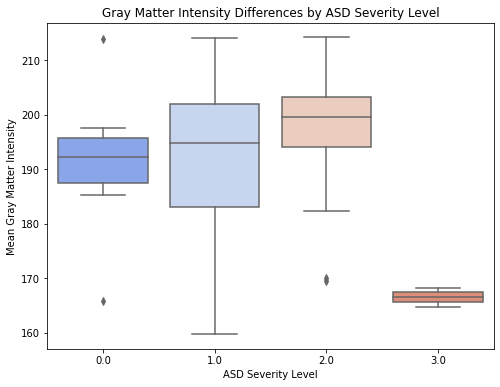

✅ Gray Matter Intensity Analysis Completed! Results saved as 'GM_Intensity_Comparison.png'.


In [8]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal

# === Step 1: Load Severity Level Data ===
severity_csv = "NYU_ABIDE_with_Severity.csv"  # Update with actual file path
severity_data = pd.read_csv(severity_csv)

# Ensure the CSV has the correct column names
print("Loaded Severity Data:")
print(severity_data.columns)

# === Step 2: Define the Folder Path for Extracted Gray Matter Images ===
gm_folder = "Gray"  # Update with actual folder path

# === Step 3: Extract Mean Gray Matter Intensity from PNG Images ===
gm_intensities = []

for filename in os.listdir(gm_folder):
    if filename.endswith(".png"):
        subject_id = filename.split("_")[0]  # Extract subject ID from filename
        subject_id = int(subject_id)  # Convert to integer for matching

        # Load the image in grayscale mode
        img_path = os.path.join(gm_folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Compute mean gray matter intensity (proxy for volume)
        gm_intensity = np.mean(img[img > 0])  # Exclude black background

        # Match severity level (Fix: Use 'SUB_ID' and 'DSM_5_Severity')
        severity_level = severity_data.loc[severity_data['SUB_ID'] == subject_id, 'DSM_5_Severity']

        if not severity_level.empty:
            gm_intensities.append({
                "Subject_ID": subject_id,
                "GM_Intensity": gm_intensity,
                "Severity_Level": severity_level.values[0]
            })

# Convert to DataFrame
gm_df = pd.DataFrame(gm_intensities)
print("Extracted Gray Matter Intensities:")
print(gm_df.head())

# === Step 4: Perform Statistical Analysis ===
kruskal_test = kruskal(
    gm_df[gm_df["Severity_Level"] == 1]["GM_Intensity"],
    gm_df[gm_df["Severity_Level"] == 2]["GM_Intensity"],
    gm_df[gm_df["Severity_Level"] == 3]["GM_Intensity"]
)
print(f"Kruskal-Wallis Test Result: H={kruskal_test.statistic}, p={kruskal_test.pvalue}")

# === Step 5: Visualize Differences in Gray Matter Intensity ===
plt.figure(figsize=(8, 6))
sns.boxplot(x="Severity_Level", y="GM_Intensity", data=gm_df, palette="coolwarm")
plt.title("Gray Matter Intensity Differences by ASD Severity Level")
plt.xlabel("ASD Severity Level")
plt.ylabel("Mean Gray Matter Intensity")
plt.savefig("GM_Intensity_Comparison.png", dpi=300)
plt.show()

print("✅ Gray Matter Intensity Analysis Completed! Results saved as 'GM_Intensity_Comparison.png'.")


Loaded Severity Data:
Index(['Unnamed: 0.1', 'Unnamed: 0', 'SUB_ID', 'X', 'subject', 'SITE_ID',
       'FILE_ID', 'DX_GROUP', 'DSM_IV_TR', 'AGE_AT_SCAN',
       ...
       'qc_anat_rater_2', 'qc_anat_notes_rater_2', 'qc_func_rater_2',
       'qc_func_notes_rater_2', 'qc_anat_rater_3', 'qc_anat_notes_rater_3',
       'qc_func_rater_3', 'qc_func_notes_rater_3', 'SUB_IN_SMP',
       'DSM_5_Severity'],
      dtype='object', length=107)
✅ Subject-wise GM intensity values saved to 'Subject_Wise_GM_Intensity.csv'.
Extracted Gray Matter Intensities:
   Subject_ID  GM_Intensity  Severity_Level
0       50952    194.452803             2.0
1       50952    194.452803             2.0
2       50953    199.699352             2.0
3       50954    197.101316             1.0
4       50955    191.177238             2.0
Kruskal-Wallis Test Result: H=7.979449072744614, p=0.01850481082012752


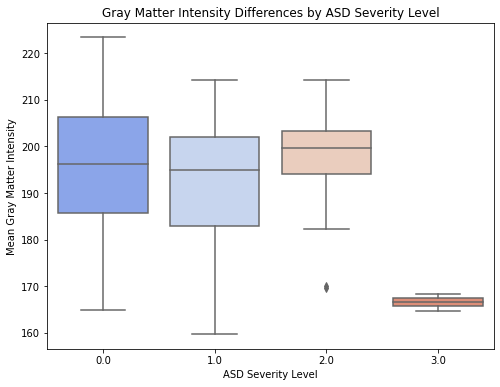

✅ Gray Matter Intensity Analysis Completed! Results saved as 'GM_Intensity_Comparison.png'.


In [10]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal

# === Step 1: Load Severity Level Data ===
severity_csv = "NYU_ABIDE_with_Severity1.csv"  # Update with actual file path
severity_data = pd.read_csv(severity_csv)

# Ensure the CSV has the correct column names
print("Loaded Severity Data:")
print(severity_data.columns)

# === Step 2: Define the Folder Path for Extracted Gray Matter Images ===
gm_folder = "Gray"  # Update with actual folder path

# === Step 3: Extract Mean Gray Matter Intensity from PNG Images ===
gm_intensities = []

for filename in os.listdir(gm_folder):
    if filename.endswith(".png"):
        subject_id = filename.split("_")[0]  # Extract subject ID from filename
        subject_id = int(subject_id)  # Convert to integer for matching

        # Load the image in grayscale mode
        img_path = os.path.join(gm_folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Compute mean gray matter intensity (proxy for volume)
        gm_intensity = np.mean(img[img > 0])  # Exclude black background

        # Match severity level
        severity_level = severity_data.loc[severity_data['SUB_ID'] == subject_id, 'DSM_5_Severity']

        if not severity_level.empty:
            gm_intensities.append({
                "Subject_ID": subject_id,
                "GM_Intensity": gm_intensity,
                "Severity_Level": severity_level.values[0]
            })

# Convert to DataFrame
gm_df = pd.DataFrame(gm_intensities)

# === Step 4: Save Subject-wise Intensity Values to CSV ===
output_csv = "Subject_Wise_GM_Intensity.csv"
gm_df.to_csv(output_csv, index=False)
print(f"✅ Subject-wise GM intensity values saved to '{output_csv}'.")

# Print first few rows
print("Extracted Gray Matter Intensities:")
print(gm_df.head())

# === Step 5: Perform Statistical Analysis ===
kruskal_test = kruskal(
    gm_df[gm_df["Severity_Level"] == 1]["GM_Intensity"],
    gm_df[gm_df["Severity_Level"] == 2]["GM_Intensity"],
    gm_df[gm_df["Severity_Level"] == 3]["GM_Intensity"]
)
print(f"Kruskal-Wallis Test Result: H={kruskal_test.statistic}, p={kruskal_test.pvalue}")

# === Step 6: Visualize Differences in Gray Matter Intensity ===
plt.figure(figsize=(8, 6))
sns.boxplot(x="Severity_Level", y="GM_Intensity", data=gm_df, palette="coolwarm")
plt.title("Gray Matter Intensity Differences by ASD Severity Level")
plt.xlabel("ASD Severity Level")
plt.ylabel("Mean Gray Matter Intensity")
# plt.savefig("GM_Intensity_Comparison.png", dpi=300)
plt.show()

print("✅ Gray Matter Intensity Analysis Completed! Results saved as 'GM_Intensity_Comparison.png'.")
